# **Sales Price Study Notebook**

## Objectives

* Answer *Business Requirement 1*:
    * The client is interested in discovering how the house attributes correlate with the sale price. 
    * Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* <code>outputs/datasets/collection/HousePriceRecords.csv</code>

## Outputs

* Generate code that answers *Business Requirement 1*.
* Generate code that can be used to build the *Streamlit App*.


## Additional Comments

* We want to perform a correlation study using the <code>pearson</code> and <code>spearman</code> methods to investigate the most relevant features relating to the sales price.
* We want to do an Exploratory Data Analysis (EDA) to have a better understanding of the *Dataset*.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

---

# Load House Sales Price Data

First we will load the data:

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePriceRecords.csv")
print(df.shape)
df.head()

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

We are interested in getting familair with the data: checking variable types and distribution, missing levels, and what these variables mean in a business context.

To do this, we use the **ProfileReport** package from the **ydata_profiling** library:

In [5]:
from ydata_profiling import ProfileReport
from ipywidgets import HTML, Button, widgets
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Findings:
* Around 10% of the data is missing.
* There are 20 numeric values.
* There are 4 categorical/text values.

As there is only a small amount of data missing overall, for the purpose of the correlation and pps study, we will not be removing any data at this stage.

---

# Sales Correlation Study

We will use the <code>spearman</code> and <code>pearson</code> methods to assess correlation levels across the numeric valyes against <code>SalePrice</code>.

1. The <code>spearman</code> methof is used to measure the monochronic relationships between features:
* We will sort the values considering the absolute value, by setting <code>key=abs</code>.
* We use <code>[1:]</code> to exclude the series performing a correlation between <code>SalePrice</code> and <code>SalePrice</code>.
* We want to see the top 10 correlations.

In [6]:
sales_corr_spearman = df.corr(method='spearman', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
sales_corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

2. The <code>pearson</code> method is used to measure the linear relationships between features:
* We will use the same parameters as above.

In [7]:
sales_corr_pearson = df.corr(method='pearson', numeric_only=True)['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
sales_corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

#### Findings:
* Both methods have a moderate to strong and positive correlation between <code>SalePrice</code> and most variables.

Next we will consider the top *5* levels of correlation between the two methods:

In [8]:
top_corr = 5
set(sales_corr_pearson[:top_corr].index.to_list() + sales_corr_spearman[:top_corr].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We will therefore study the following variables and investigate whether:
* Sold houses with a certain <code>GarageArea</code> (Garage area, measurement).
* Sold houses with a certain <code>YearBuilt</code> (Year house was built).
* Sold houses with a certain <code>1stFlrSF</code> (1st Floor square feet, measurement).
* Sold houses with a <code>TotalBsmtSF</code> (Total Basement square feet, measurement).
* Sold houses with a certain <code>OverallQual</code> (Overall Finish & Material).
* Sold houses with a certain <code>OverallQual</code> (Overall Finish & Material).


**Note that there were 6 top variables found when searching for 5, this could be because there were variables with the same correlation levels, we will therefore use all 6.**

In [9]:
vars_to_study = list(set(sales_corr_pearson[:top_corr].index.to_list() + sales_corr_spearman[:top_corr].index.to_list()))
vars_to_study

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'GarageArea',
 'GrLivArea']

---

# EDA on Selected Variables

Next we will display the selected variables from the correlation study with <code>SalePrice</code>:

In [10]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,OverallQual,TotalBsmtSF,1stFlrSF,YearBuilt,GarageArea,GrLivArea,SalePrice
0,7,856,856,2003,548,1710,208500
1,6,1262,1262,1976,460,1262,181500
2,7,920,920,2001,608,1786,223500
3,7,756,961,1915,642,1717,140000
4,8,1145,1145,2000,836,2198,250000


Next we will distribute it by <code>SalesPrice</code>:

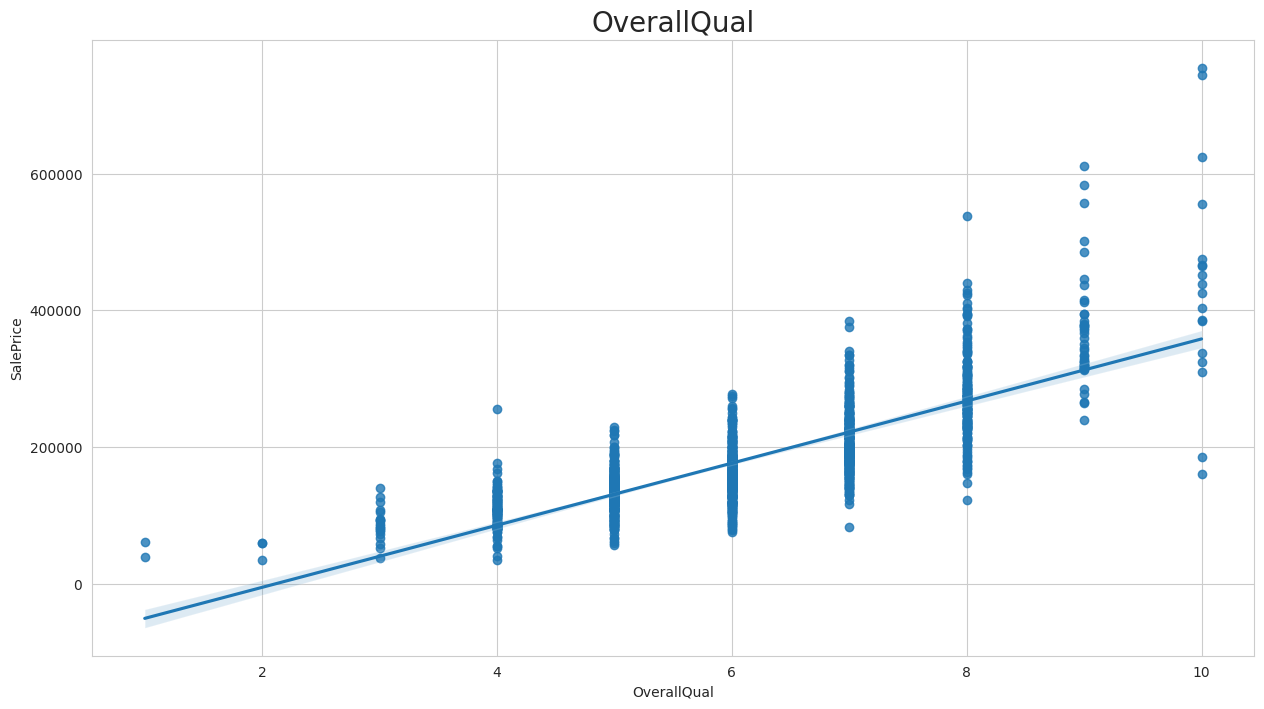

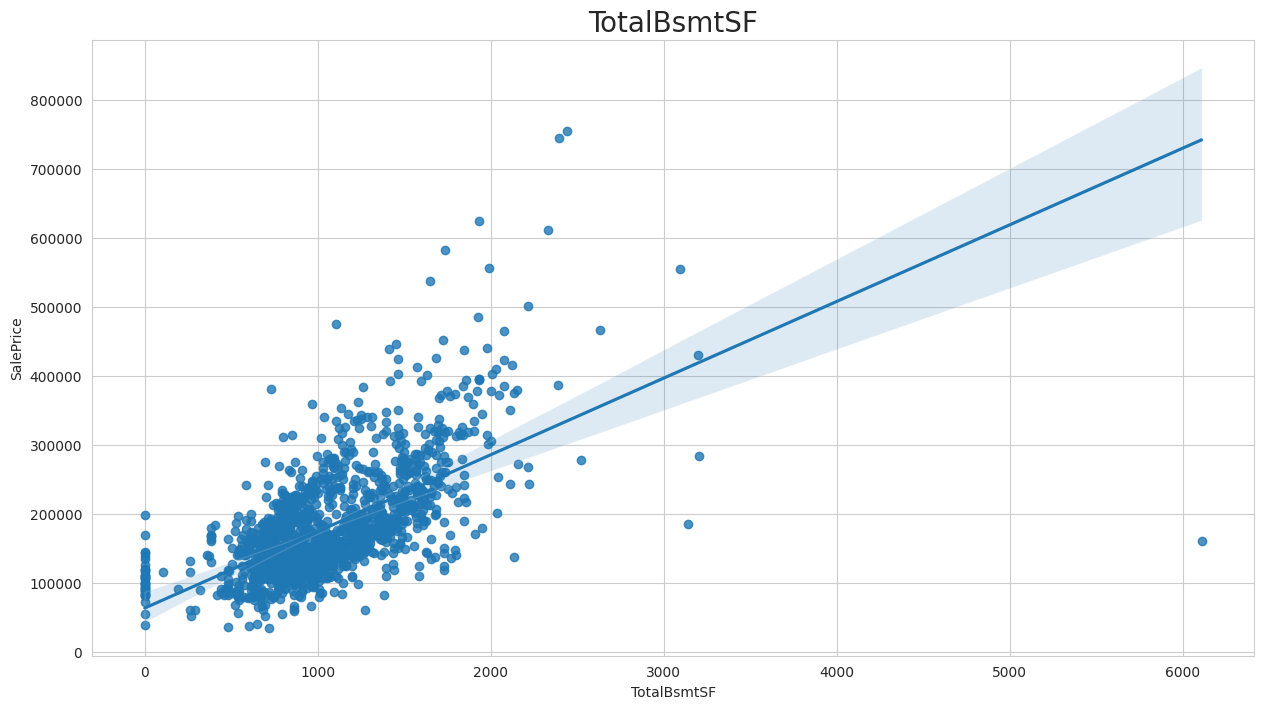

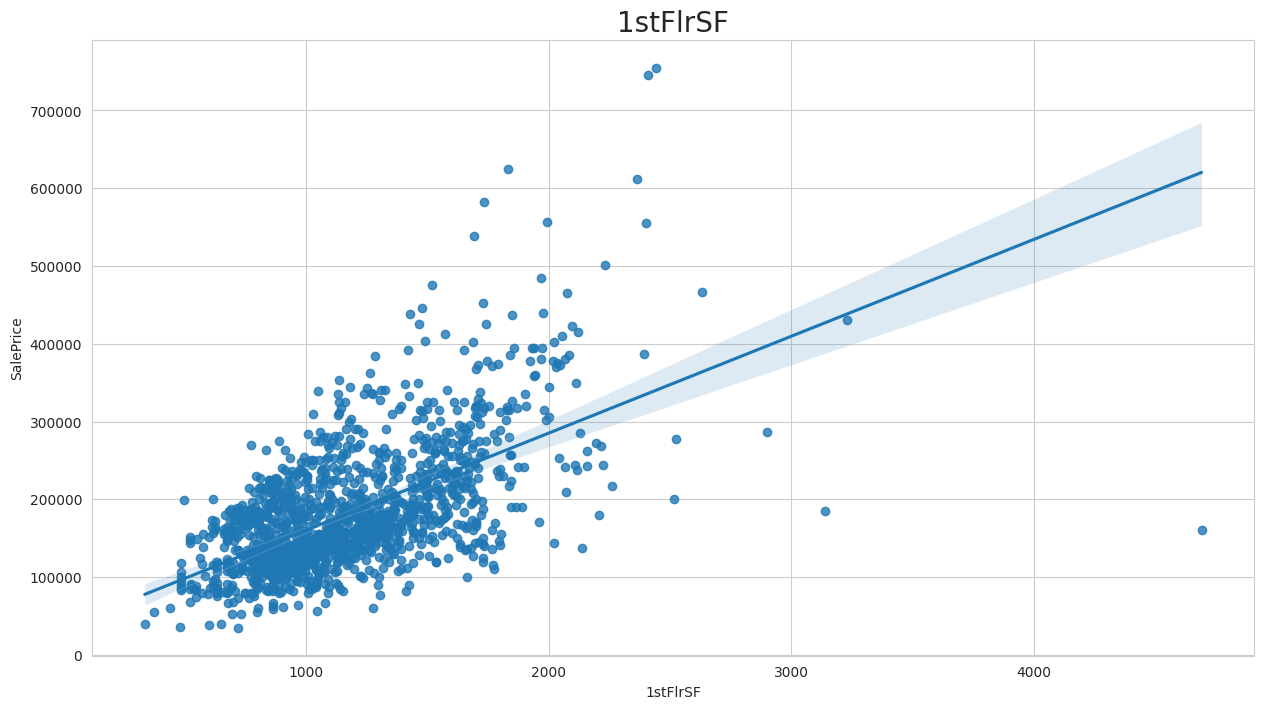

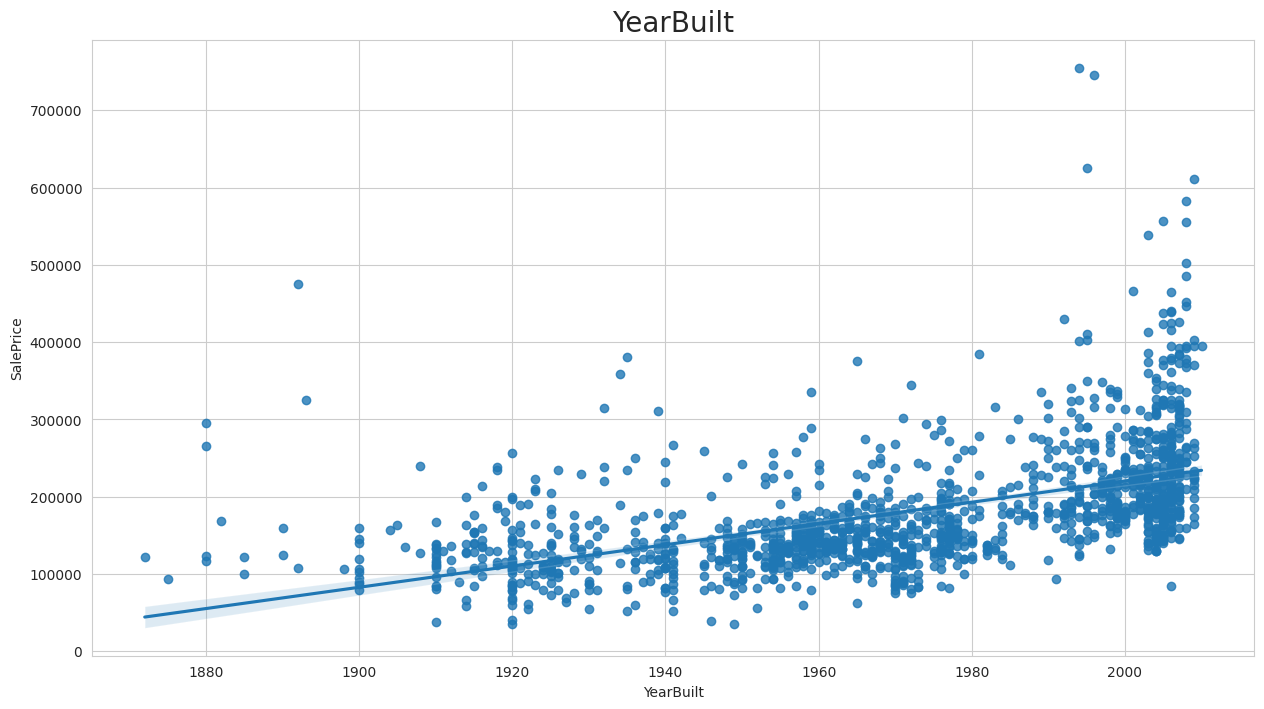

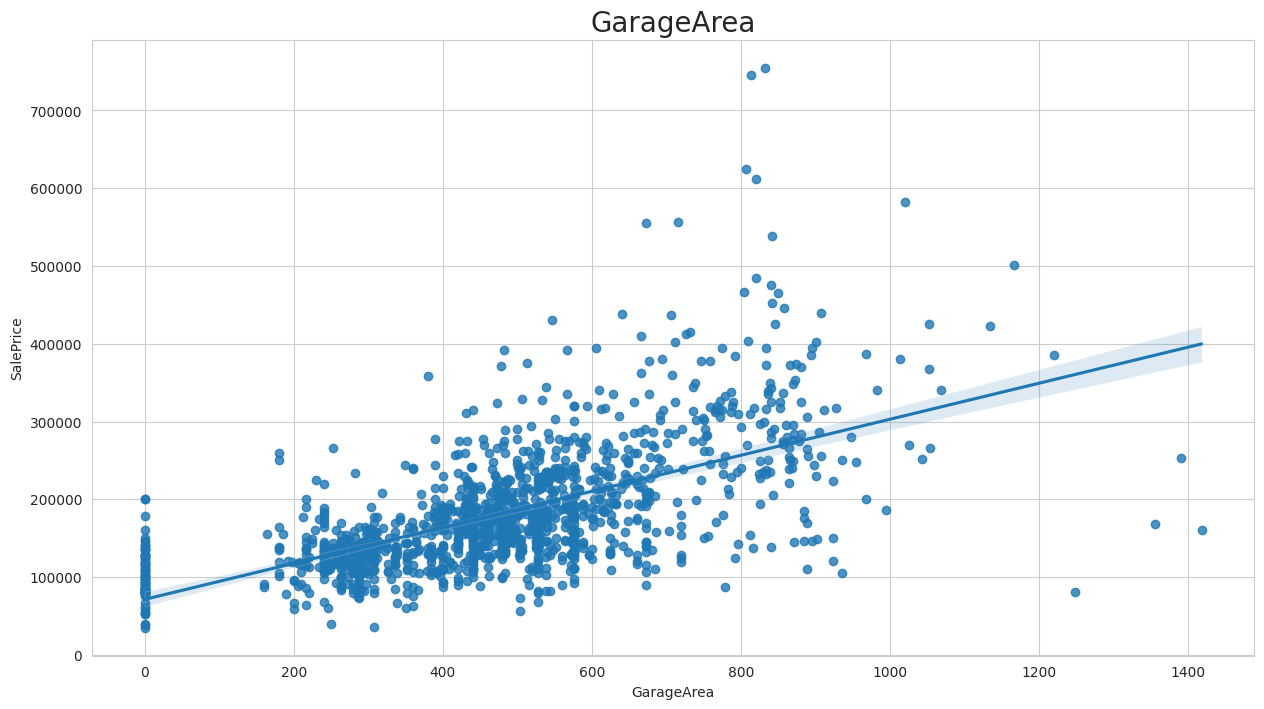

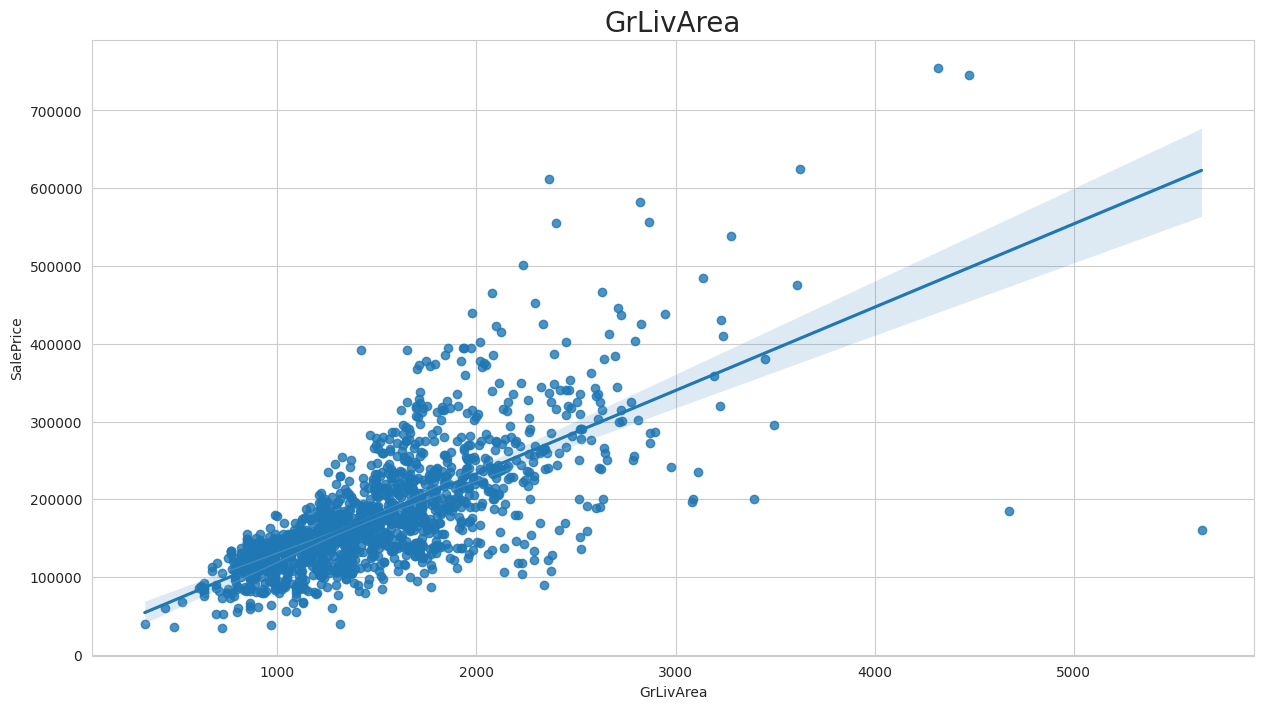

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

#### Findings:

* The correlation analysis suggests that the the ground floor living area (<code>GrLivArea</code>), first floor area (<code>1stFlrSF</code>), basement (<code>TotalBsmtSF</code>), and garage area (<code>GarageArea</code>) strongly influence the <code>SalePrice</code> of a house.
* The analysis also suggets that the year of the house (<code>YearBuilt</code>), and quality of materials used/finishes (<code>OverallQual</code>) have a moderate influence on the (<code>SalePrice</code>) of a house.

---

# Conclusions

We will therefore study the following variables and investigate whether:
* Sold houses with a certain <code>GarageArea</code> (Garage area, measurement).
* Sold houses with a certain <code>YearBuilt</code> (Year house was built).
* Sold houses with a certain <code>1stFlrSF</code> (1st Floor square feet, measurement).
* Sold houses with a <code>TotalBsmtSF</code> (Total Basement square feet, measurement).
* Sold houses with a certain <code>OverallQual</code> (Overall Finish & Material).
* Sold houses with a certain <code>OverallQual</code> (Overall Finish & Material).

Findings from EDA: 
* The correlation analysis suggests that the the ground floor living area (<code>GrLivArea</code>), first floor area (<code>1stFlrSF</code>), basement (<code>TotalBsmtSF</code>), and garage area (<code>GarageArea</code>) strongly influence the <code>SalePrice</code> of a house.
* The analysis also suggets that the year of the house (<code>YearBuilt</code>), and quality of materials used/finishes (<code>OverallQual</code>) have a moderate influence on the (<code>SalePrice</code>) of a house.

The next steps is to complete *Data Cleaning* and perform a *PPS Study*.